#### Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:


* Si el parametro color vale 1, la imagen debe mostrar activos ´unicamente el color azul.
* Si el parametro color vale 2, la imagen debe mostrar activos ´unicamente el color verde.
* Si el parametro color vale 3, la imagen debe mostrar activos ´unicamente el color rojo.
* Si el parametro color vale 10, la imagen debe mostrar activos ´unicamente los colores rojo y verde.
* Si el parametro color vale 20, la imagen debe mostrar activos ´unicamente los colores verde y azul.
* Si el parametro color vale 30, la imagen debe mostrar activos ´unicamente los colores azul y rojo.


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("Imagen_Ejercicio_1.jpg")


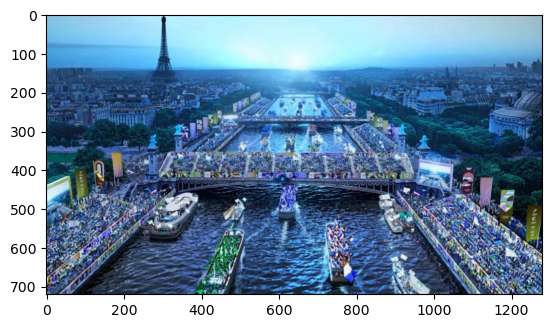

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img_salida = np.zeros_like(img)

In [5]:
def filtrar_colores(img, color):
 
    if color == 1:
        # Activar solo el canal azul
        img_salida[:,:,0] = img[:,:,0]
    elif color == 2:
        # Activar solo el canal verde
        img_salida[:,:,1] = img[:,:,1]
    elif color == 3:
        # Activar solo el canal rojo
        img_salida[:,:,2] = img[:,:,2]
    elif color == 10:
        # Activar los canales rojo y verde
        img_salida[:,:,1] = img[:,:,1]
        img_salida[:,:,2] = img[:,:,2]
    elif color == 20:
        # Activar los canales verde y azul
        img_salida[:,:,0] = img[:,:,0]
        img_salida[:,:,1] = img[:,:,1]
    elif color == 30:
        # Activar los canales azul y rojo
        img_salida[:,:,0] = img[:,:,0]
        img_salida[:,:,2] = img[:,:,2]
    else:
        raise ValueError("Parámetro color no válido")

    return img_salida



In [8]:
img_salida = filtrar_colores(img, 2)

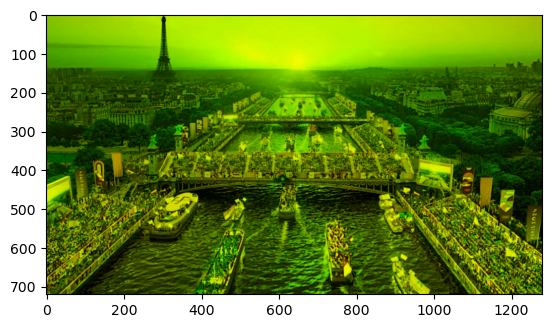

In [9]:
plt.imshow(img_salida)
plt.show()


#### Problema 2

En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1, imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.


In [20]:
# Cargar las imágenes de prueba
imagen1 = cv2.imread('perro_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread('perro_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen3 = cv2.imread('perro_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)


In [24]:
def nueva_imagen(imagen1, imagen2, imagen3):
    assert imagen1.shape == imagen2.shape == imagen3.shape, "Las imágenes deben tener las mismas dimensiones"
    
    imagen_color = cv2.merge((imagen1, imagen2, imagen3))
    
    return imagen_color

In [25]:
imagen_color = nueva_imagen(imagen1, imagen2, imagen3)

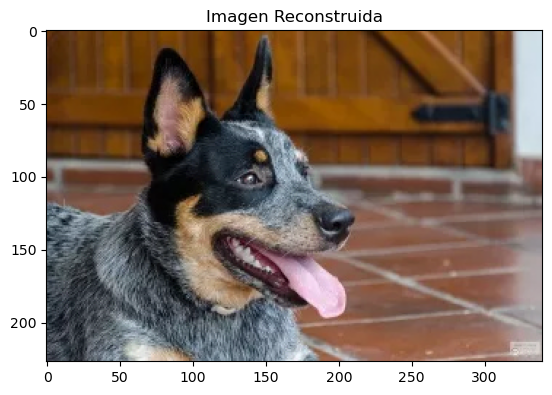

In [26]:
plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Reconstruida')
plt.show()

#### Problema 3

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [27]:

ejercicio_3 = cv2.imread('ejercicio_3.jpg')

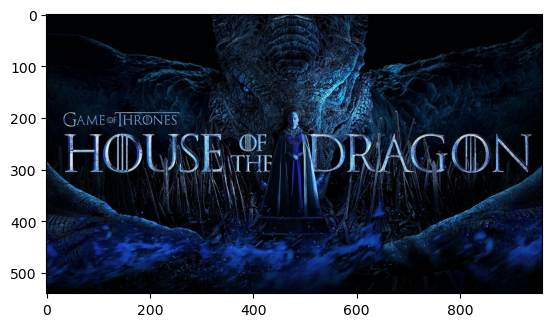

In [28]:
plt.imshow(ejercicio_3)
plt.show()

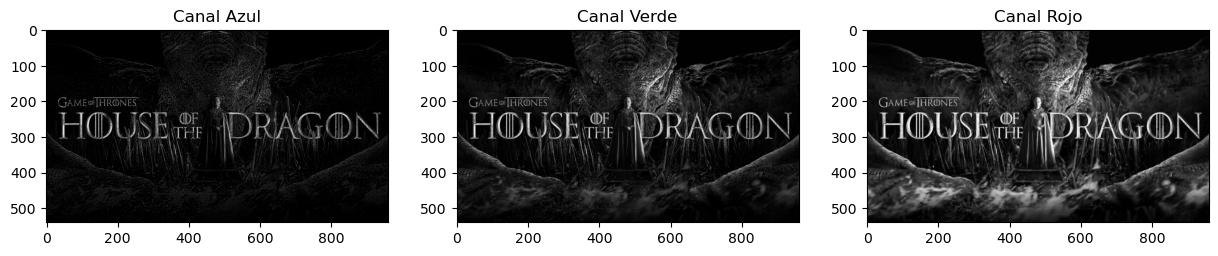

In [30]:
def escala_grises(ejercicio_3):
   
    azul, verde, rojo = cv2.split(ejercicio_3)
    
    return azul, verde, rojo


# Obtener las escalas de grises en 3D
azul, verde, rojo = escala_grises(ejercicio_3)

# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(azul, cmap='gray')
plt.title('Canal Azul')

plt.subplot(1, 3, 2)
plt.imshow(verde, cmap='gray')
plt.title('Canal Verde')

plt.subplot(1, 3, 3)
plt.imshow(rojo, cmap='gray')
plt.title('Canal Rojo')

plt.show()

#### Problema 4

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion.


In [32]:
ejercicio_4 = cv2.imread("ejercicio_3.jpg")

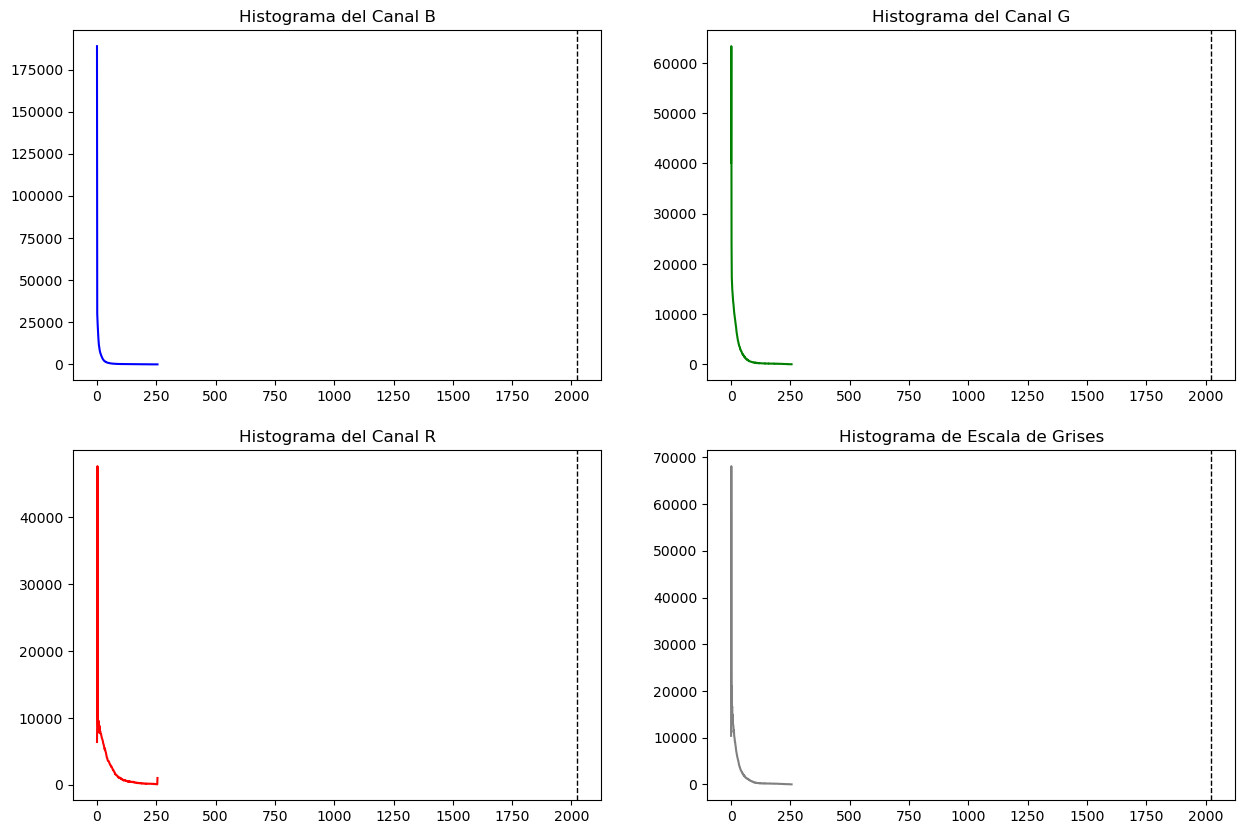

In [36]:
def mostrar_histogramas(ejercicio_4):
    
    colores = ('b', 'g', 'r')
    plt.figure(figsize=(15, 10))
    
    for i, color in enumerate(colores):
        hist = cv2.calcHist([ejercicio_4], [i], None, [256], [0, 256])
        plt.subplot(2, 2, i + 1)
        plt.plot(hist, color=color)
        plt.title(f'Histograma del Canal {color.upper()}')
        plt.axvline(x=np.mean(hist), color='k', linestyle='dashed', linewidth=1)
    
    # Convertir la imagen a escala de grises
    gris = np.mean(ejercicio_4, axis=2)
    hist_gris = cv2.calcHist([gris.astype(np.uint8)], [0], None, [256], [0, 256])
    
    plt.subplot(2, 2, 4)
    plt.plot(hist_gris, color='gray')
    plt.title('Histograma de Escala de Grises')
    plt.axvline(x=np.mean(hist_gris), color='k', linestyle='dashed', linewidth=1)
    
    plt.show()



# Mostrar los histogramas
mostrar_histogramas(ejercicio_4)

#### Problema 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

* El enfoque de escala de grises ponderado es un método para convertir una imagen en color a escala de grises teniendo en cuenta la sensibilidad del ojo humano a diferentes colores. En lugar de usar un promedio aritmético simple de los valores de los canales de color, este método asigna pesos específicos a cada canal de color basados en cómo percibimos la luminancia de esos colores.

* El ojo humano no percibe los colores de manera uniforme. Somos más sensibles a ciertos colores, especialmente el verde, y menos sensibles a otros, como el azul. Por lo tanto, para obtener una imagen en escala de grises que refleje mejor la percepción humana de la luminancia, se utilizan coeficientes ponderados.

In [38]:
ejercicio_5 = cv2.imread('ejercicio_3.jpg')


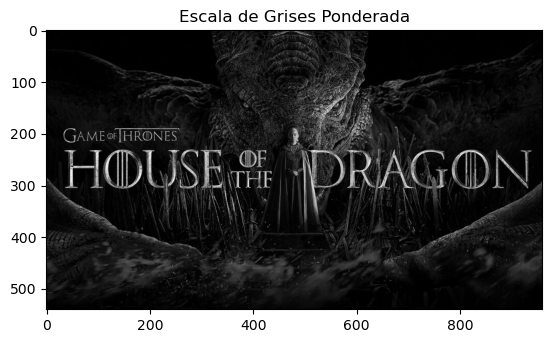

In [39]:
def escala_grises_ponderada(ejercicio_5):
   
    pesos = [0.2989, 0.5870, 0.1140]
    gris_ponderado = np.dot(ejercicio_5[..., :3], pesos)
    
    return gris_ponderado


imagen_gris_ponderada = escala_grises_ponderada(ejercicio_5)

# Mostrar el resultado
plt.imshow(imagen_gris_ponderada, cmap='gray')
plt.title('Escala de Grises Ponderada')
plt.show()

#### Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajo los demas ejercicios.

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que representa colores de una manera que se asemeja más a la percepción humana que el espacio de color RGB (Red, Green, Blue). HSV se basa en tres componentes:

Hue (Tono): Representa el color en sí mismo y se mide en grados (0° a 360°) en el círculo de colores. El matiz define el tipo de color, como rojo, verde, azul, etc.

* 0° o 360°: Rojo
* 60°: Amarillo
* 120°: Verde
* 180°: Cian
* 240°: Azul
* 300°: Magenta 

Saturation (Saturación): Indica la intensidad o pureza del color. Se mide en porcentaje (0% a 100%). Una saturación del 0% significa un color gris (sin color), mientras que 100% es un color puro.

Value (Valor): Representa la luminosidad o brillo del color y se mide en porcentaje (0% a 100%). Un valor del 0% es completamente oscuro (negro), y 100% es el brillo máximo del color.